### Loading and plotting data 

Author:
- |
    Sofia Dahl, sof@create.aau.dk\
    Dept. Architecture, Design and Media Technology, Aalborg University Copenhagen
---

After working your way through this notebook you should be able to...
-   Load and plot data from excel file
-   Mask extreme values as NaN and drop them


In [67]:
#Loading libraries we will use in this notebook
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
#If using  colab, this code needs executing 
#from google.colab import files

#uploaded = files.upload()
#After which you can use the "browse"-button to locate and load the file.

In [69]:
# We will use pandas read_excel to read the data
# Read more about the function by executing
#help(pd.read_excel)

In [70]:
#The first column (col 0) does not contain anything useful
#Since we already know this we can skip this and just use columns 1-3
data = pd.read_excel("data/UX2-datacollection.xlsx", usecols=[1,2,3])

In [71]:
#We can print the first five lines in data
data.head(5)

,Age,Height,MobileOS
0,23.0,186.0,iOS
1,21.0,207.0,IOS
2,20.0,182.0,Android
3,21.0,165.0,IOS
4,22.0,179.0,Android


In [72]:
#And check how many rows and columns in all
data.shape

(56, 3)

In [73]:
#We make the data into a data frame

df=pd.DataFrame(data)

#It is also possible to drop columns or rows after this is done, check
#DataFrame.drop

In [74]:
#The good thing about dataFrame is the quick description of data 
df.describe()

,Age,Height
count,56.000000,56.000000
mean,39.000000,165.089286
std,46.236153,47.237611
min,18.000000,19.000000
25%,21.000000,167.000000
50%,22.500000,178.500000
75%,27.000000,184.500000
max,188.000000,207.000000


In [75]:
#But what about the categorical data? We can specify that this also should be described
df.describe(include='all')
#but note, that this is done in a different way

,Age,Height,MobileOS
count,56.000000,56.000000,56
unique,NaN,NaN,4
top,NaN,NaN,iOS
freq,NaN,NaN,23
mean,39.000000,165.089286,NaN
std,46.236153,47.237611,NaN
min,18.000000,19.000000,NaN
25%,21.000000,167.000000,NaN
50%,22.500000,178.500000,NaN
75%,27.000000,184.500000,NaN


Using data frames we can specify a variable and use a selection based on values in that particular variable.

In [76]:
# We can use indexing to find the instances that are too large
# We then  make another data frame with only these values

temp=df.loc[lambda df: df['Age'] < 60, :]

# check that the new data frame is shorter
temp.shape

(50, 3)

In [77]:
#The real power in data frames comes, when we can use grouping functions 
#to get analysis for different groups. Here is one example:

df.groupby("MobileOS").mean()

,Age,Height
MobileOS,,
Andriod,29.000000,186.500000
Android,48.090909,158.363636
IOS,57.666667,144.222222
iOS,23.869565,177.826087


## Plotting

<AxesSubplot:xlabel='Age', ylabel='Height'>

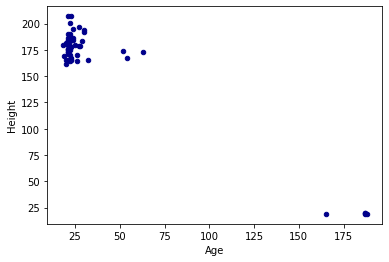

In [78]:
#We can plot in pandas, referring to the variables in the dataframe
df.plot.scatter(x='Age',y='Height',c='DarkBlue')

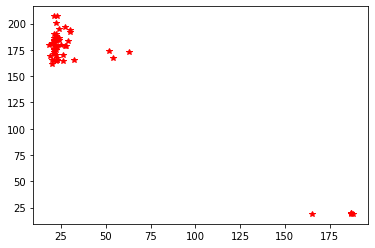

In [79]:
#But matplotlib is more used in general. Then we need to use the full dataframe name
plt.plot(df.Age,df.Height, 'r*')
plt.show()

We can already see we have some clear outliers. That is, data points that are way outside the range from the other values.

Another way to visualize data is a *box plot* which shows the distribution of individual data points and how many that fall within the different *quartiles* of the data. In other words, if we are to sort our data so that we have buckets containing 25% of the total data points, the box plot will show the range of the data in three of these buckets (Q1-Q3) called interquartile range. That is where 25-75% of data points are located. 

<function matplotlib.pyplot.show(close=None, block=None)>

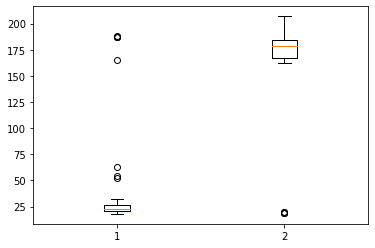

In [80]:
plt.boxplot([df.Age,df.Height])

plt.show

There are different functions and packages to do plots like this. Depending on the tool, the meaning of the box, the orange "middle" point etc can differ slightly. For this function, we can read that the median of data points (dividing 50% of data points) is shown as the orange middle line.
The "error bars" or "whiskers" that extend beyond the box itself indicate a further range of data (typically 1.5 times the interquartile range Q3-Q1). The error bar stretch until the last data point within this range. Any data points outside this are so far separated from the main bulk of data points that they typically are considered to be outliers.

We can take this into account when considering whether some data points should ge excluded from the data set.
In our case, it is possible (although less likely given that we know the group in question) that a student is 50 or even 60 years old. But hardly more than 150. Likewise, it is unheard of that persons at this age are less than 25 cm tall. Let us therefore proceed to remove some of the obvious errors.


## Masking and dropping data

In [81]:
# RatherAnother way to remove extreme data point is to mask these values

# We can create a copy of the data frame, excluding too low heights
tmp=df.mask(df.Height < 50)

# And another excluding extreme ages
tmp2 = tmp.mask(tmp.Age > 60)

# Uncomment to check the whole data frame
# tmp2


These extreme values have now been replaced by NaN, which means Not-a-Number. 

NaN can appear also in our original data, for example when participants have omitted to enter data for a particular question. 

Therefore it is good that we conveniently drop the NaN.

In [82]:
dfclean= tmp2.dropna(how="any") 

#Chec size of data frame
dfclean.shape

(50, 3)

In [83]:
# We can now compare the descriptive statistics 
dfclean.describe()

,Age,Height
count,50.000000,50.000000
mean,24.140000,179.500000
std,6.657848,11.205411
min,18.000000,162.000000
25%,21.000000,170.250000
50%,22.000000,179.500000
75%,24.000000,186.000000
max,54.000000,207.000000


## Adding variables to data frame

In [84]:
# First we geneerate some fake data on task completion

completion=pd.Series(data=np.random.randint(0,2,len(dfclean)))


dfclean['Success'] = completion

# Check that the new variable has been added
dfclean.columns


/var/folders/sy/g3g_wgpd58g32hfw1frq8t640000gn/T/ipykernel_43908/1250079294.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean['Success'] = completion


Index(['Age', 'Height', 'MobileOS', 'Success'], dtype='object')